<a href="https://colab.research.google.com/github/CalebAnderson22/PHY122/blob/main/N2L_Anderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 2

Caleb Anderson

02 November 2024

#  <font color='Red'> **Import Necessary Modules** </font>

In [1659]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, sqrt, array, zeros
from numpy.linalg import norm
from mpl_toolkits import mplot3d
import textwrap

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

###  <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

###  <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [1660]:
dt = 0.1  ## s (detector time resolution, time-step)
t0 = 0.0  ## s (initial experiment time)
tf = 10.  ## s (final   experiment time)

T  = arange(t0, tf, dt)

print(T)
print("we have " + str(len(T)) + " time points")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
we have 100 time points


#   <font color='Red'> **Experiment I: Gravity Free-Fall** </font>

##   <font color='Red'> To begin lets start with by defining an initial position, initial velocity, and mass. </font>

In [1661]:
x_0  = array([0., 500., 0.]) ## m : initial position vector/array
v_0  = array([0., 0., 0.]) ## m/s : initial velocity vector/array
m    =  10.00   ## kg : mass of your particle
g    = -9.81    ## m/s/s : surface-gravity

##   <font color='Red'> Now lets define our force as a function of time, f_t . </font>

In [1662]:
f_gravity      = zeros( (len(T), 3) ) ## initialize an empty (i.e. zero-filled) 'force-trajectory' array
f_gravity[:,1] = m * g ## fill-in all entries of axis-0, i.e. the x-axis, for all, hence ":" time-points

##   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [1663]:
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = f_gravity[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt**2 ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = f_gravity[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

In [1664]:
dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t, & f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

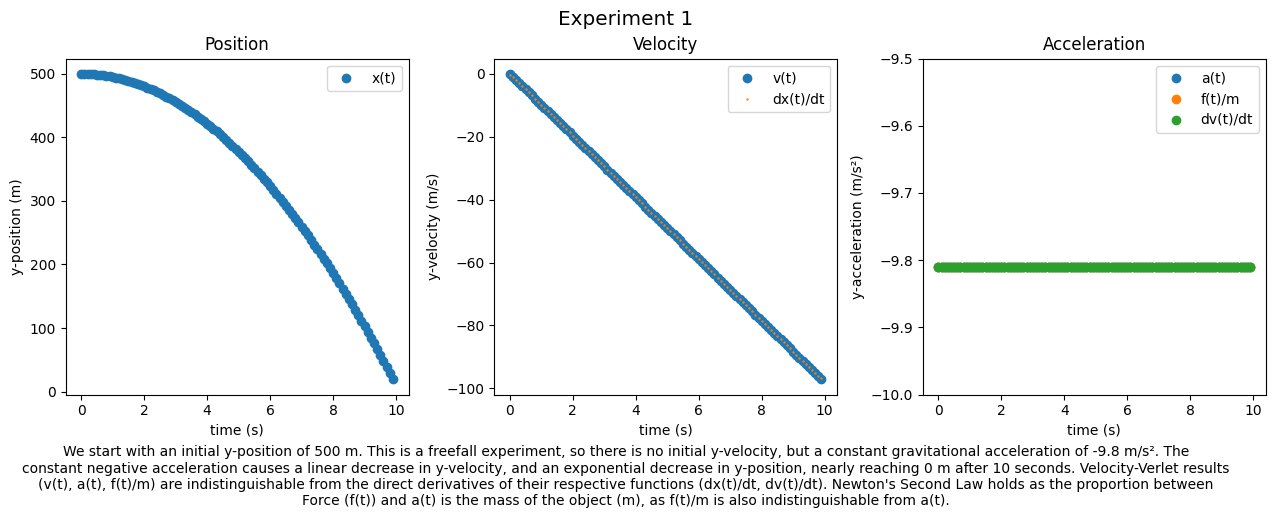

In [1665]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.text(1, 1, "Experiment 1", ha='center', fontsize='x-large')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2, top=0.93, bottom=0.23)
caption = "We start with an initial y-position of 500 m. This is a freefall experiment, so there is no initial y-velocity,"\
            " but a constant gravitational acceleration of -9.8 m/s\u00b2. The constant negative acceleration causes a linear decrease in y-velocity,"\
            " and an exponential decrease in y-position, nearly reaching 0 m after 10 seconds. Velocity-Verlet results (v(t), a(t), f(t)/m) are indistinguishable"\
            " from the direct derivatives of their respective functions (dx(t)/dt, dv(t)/dt). Newton's Second Law holds as the proportion between Force (f(t))"\
            " and a(t) is the mass of the object (m), as f(t)/m is also indistinguishable from a(t)."
caption_wrapped = textwrap.fill(caption, width=175)
fig.text(1, 0, caption_wrapped, ha='center')

ax1.scatter(T, R_tx[:,1], label="x(t)")
ax1.set_title("Position")
ax1.legend(loc="upper right")
ax1.set(xlabel='time (s)', ylabel='y-position (m)')

ax2.scatter(T, V_tx[:,1], label="v(t)")
ax2.scatter(T, dRdt_tx[:,1], s=0.5, label="dx(t)/dt")
ax2.set_title("Velocity")
ax2.legend(loc="upper right")
ax2.set(xlabel='time (s)', ylabel='y-velocity (m/s)')

ax3.scatter(T, A_tx[:,1], label="a(t)")
ax3.scatter(T, f_gravity[:,1]/m, label="f(t)/m")
ax3.scatter(T, dVdt_tx[:,1], label="dv(t)/dt")
ax3.set_ylim(-10,-9.5)
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='y-acceleration (m/s\u00b2)')

fig.show()

###   <font color='Red'> Let's replot these graphs but for the magnitude of the vectors. </font>

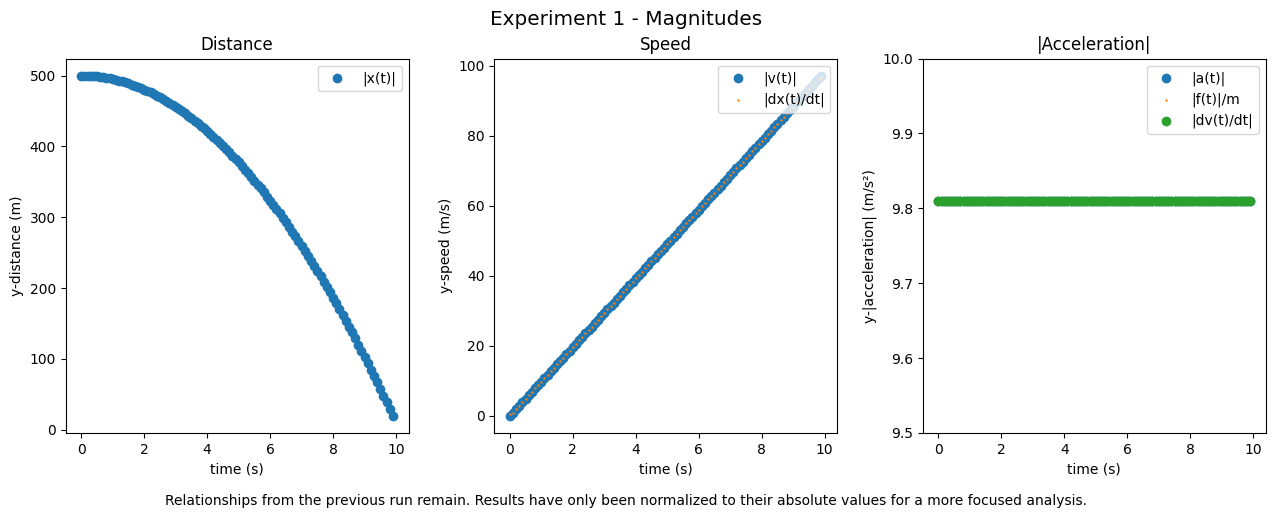

In [1666]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.text(1, 1, "Experiment 1 - Magnitudes", ha='center', fontsize='x-large')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2, top=0.93, bottom=0.15)
caption = "Relationships from the previous run remain. Results have only been normalized to their absolute values for a more focused analysis."
caption_wrapped = textwrap.fill(caption, width=150)
fig.text(1, 0, caption_wrapped, ha='center')

ax1.scatter(T, norm(R_tx, axis=1), label="|x(t)|")
ax1.legend(loc="upper right")
ax1.set_title("Distance")
ax1.set(xlabel='time (s)', ylabel='y-distance (m)')

ax2.scatter(T, norm(V_tx, axis=1), label="|v(t)|")
ax2.scatter(T, norm(dRdt_tx, axis=1), s=0.5, label="|dx(t)/dt|")
ax2.legend(loc="upper right")
ax2.set_title("Speed")
ax2.set(xlabel='time (s)', ylabel='y-speed (m/s)')

ax3.scatter(T, norm(A_tx, axis=1), label="|a(t)|")
ax3.scatter(T, norm(f_gravity, axis=1)/m, s=0.5, label="|f(t)|/m")
ax3.scatter(T, norm(dVdt_tx, axis=1), label="|dv(t)/dt|")
ax3.set_ylim(9.5, 10)
ax3.legend(loc="upper right")
ax3.set_title("|Acceleration|")
ax3.set(xlabel='time (s)', ylabel='y-|acceleration| (m/s\u00b2)')

fig.show()

#   <font color='Red'> **Experiment II: Forces on a Cart I** </font>

###  <font color='Red'> To begin lets start with by defining an initial position & velocity, and mass. </font>

In [1667]:
x_0  = array([0., 0., 0.]) ## m : initial position vector/array
v_0  = array([0., 0., 0.]) ## m/s : initial velocity vector/array
m    = 5.0 ## kg : mass of your particle

###  <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

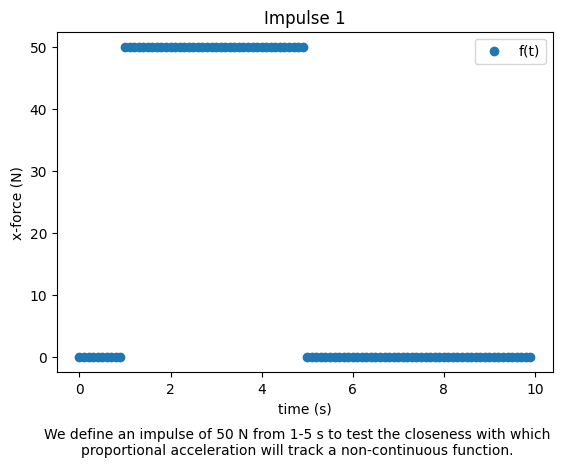

In [1668]:
F_tx          = zeros( (len(T), 3) ) ## initialize an empty (ie zero-filled) 'force-trajectory' array
F_tx[10:50,:] = 5*array([10.,0.,0.])  ## take entries 10-through-50 and fill-in with given vector/array

### plot 0-axis force
plt.scatter(T, F_tx[:,0], label="f(t)")
plt.subplots_adjust(bottom=0.17)
plt.legend(loc="upper right")
plt.title("Impulse 1")
plt.xlabel('time (s)')
plt.ylabel('x-force (N)')
caption = "We define an impulse of 50 N from 1-5 s to test the closeness with which proportional acceleration will track a non-continuous function."
caption_wrapped = textwrap.fill(caption, width=75)
plt.figtext(0.5, 0, caption_wrapped, ha='center')
plt.show()

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [1669]:
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = F_tx[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = F_tx[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [1670]:
dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

###  <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t, and f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>


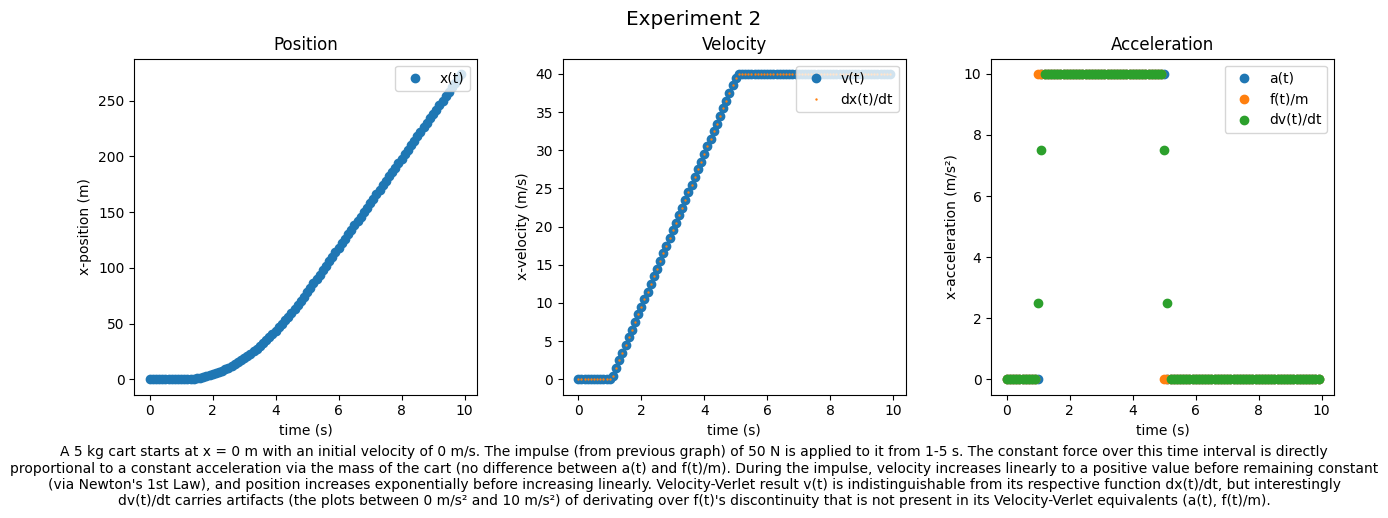

In [1671]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.text(1, 1, "Experiment 2", ha='center', fontsize='x-large')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2, top=0.93, bottom=0.23)
caption = "A 5 kg cart starts at x = 0 m with an initial velocity of 0 m/s."\
            " The impulse (from previous graph) of 50 N is applied to it from 1-5 s. The constant force over this time interval is directly proportional"\
            " to a constant acceleration via the mass of the cart (no difference between a(t) and f(t)/m)."\
            " During the impulse, velocity increases linearly to a positive value before remaining constant"\
            " (via Newton's 1st Law), and position increases exponentially before increasing linearly. Velocity-Verlet result v(t) is indistinguishable from"\
            " its respective function dx(t)/dt, but interestingly dv(t)/dt carries artifacts (the plots between 0 m/s\u00b2 and 10 m/s\u00b2) of derivating over f(t)'s discontinuity"\
            " that is not present in its Velocity-Verlet equivalents (a(t), f(t)/m)."
caption_wrapped = textwrap.fill(caption, width=200)
fig.text(1, 0, caption_wrapped, ha='center')

ax1.scatter(T, R_tx[:,0], label="x(t)")
ax1.set_title("Position")
ax1.legend(loc="upper right")
ax1.set(xlabel='time (s)', ylabel='x-position (m)')

ax2.scatter(T, V_tx[:,0], label="v(t)")
ax2.scatter(T, dRdt_tx[:,0], s=0.5, label="dx(t)/dt")
ax2.set_title("Velocity")
ax2.legend(loc="upper right")
ax2.set(xlabel='time (s)', ylabel='x-velocity (m/s)')

ax3.scatter(T, A_tx[:,0], label="a(t)")
ax3.scatter(T, F_tx[:,0]/m, label="f(t)/m")
ax3.scatter(T, dVdt_tx[:,0], label="dv(t)/dt")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='x-acceleration (m/s\u00b2)')

fig.show()

#   <font color='Red'> **Experiment III: Forces on a Cart II** </font>

###   <font color='Red'> To begin lets start with by defining an initial mass, position, & velocity. </font>

In [1672]:
x_0 = array([0., 0., 0.]) ## m : initial position vector/array
v_0 = array([0., 0., 0.]) ## m/s : initial velocity vector/array
m   = 5.0 ## kg : mass of your particle

###   <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [1673]:
dt = 0.01  ## s (detector time resolution, time-step)
t0 = 0.00  ## s (initial experiment time)
tf = 10.0  ## s (final   experiment time)

T  = arange(t0, tf, dt) ## make time-array

print("we have " + str(len(T)) + " time points")

we have 1000 time points


###   <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

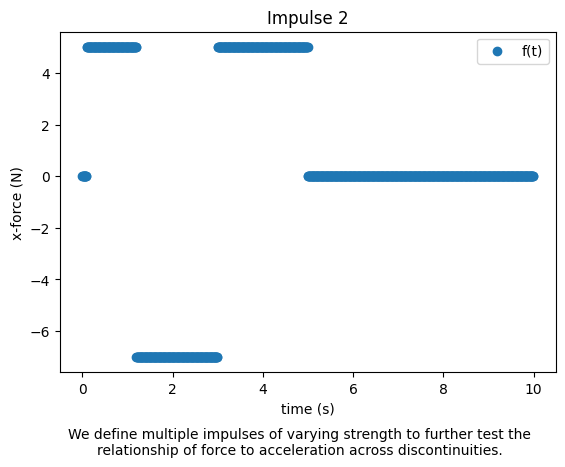

In [1674]:
F_tx = zeros( (len(T), 3) ) ## initialize an empty (ie zero-filled) 'force-trajectory' array
F_tx[10:500]  =  5*array([1.,0.,0.]) ## take entries 10-through-500 and fill-in with given vector/array
F_tx[120:300] = -7*array([1.,0.,0.]) ## take entries 120-through-300 and fill-in with given vector/array

### plot 0-axis force
plt.scatter(T, F_tx[:,0], label="f(t)")
plt.legend(loc="upper right")
plt.subplots_adjust(bottom=0.17)
plt.title("Impulse 2")
plt.xlabel('time (s)')
plt.ylabel('x-force (N)')
caption = "We define multiple impulses of varying strength to further test the relationship of force to acceleration across discontinuities."
caption_wrapped = textwrap.fill(caption, width=75)
plt.figtext(0.5, 0, caption_wrapped, ha='center')
plt.show()

###   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [1675]:
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = F_tx[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = F_tx[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [1676]:
dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dvdt_t, and f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

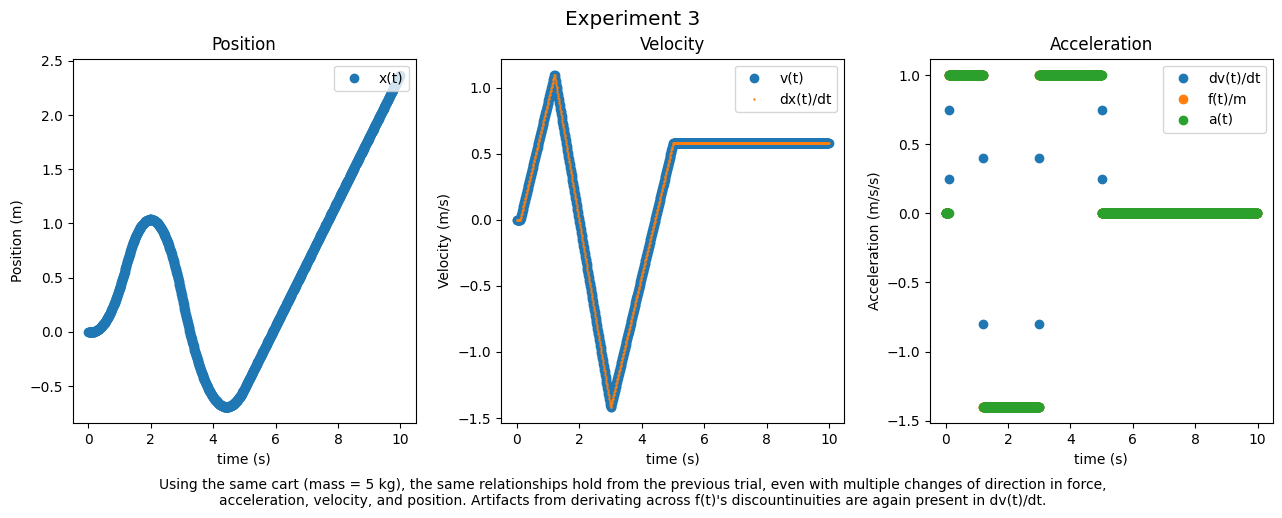

In [1677]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.text(1, 1, "Experiment 3", ha='center', fontsize='x-large')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2, top=0.93, bottom=0.17)
caption = "Using the same cart (mass = 5 kg), the same relationships hold from the previous trial, even with multiple changes of direction in force,"\
            " acceleration, velocity, and position. Artifacts from derivating across f(t)'s discountinuities are again present in dv(t)/dt."
caption_wrapped = textwrap.fill(caption, width=150)
fig.text(1, 0, caption_wrapped, ha='center')

ax1.scatter(T, R_tx[:,0], label="x(t)")
ax1.set_title("Position")
ax1.legend(loc="upper right")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(T, V_tx[:,0], label="v(t)")
ax2.scatter(T, dRdt_tx[:,0], s=0.5, label="dx(t)/dt")
ax2.set_title("Velocity")
ax2.legend(loc="upper right")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(T, dVdt_tx[:,0], label="dv(t)/dt")
ax3.scatter(T, F_tx[:,0]/m, label="f(t)/m")
ax3.scatter(T, A_tx[:,0], label="a(t)")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

###   <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###   <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>

This lab explores the relationship between position, velocity, acceleration, force, and time under Newton’s 2nd Law. That Law is defined in the prompt thusly: “For an object of given mass m, given a force, f, this introduces an acceleration, a," such that "f = ma".

Experiment 1 modeled freefall, and I thus restricted all manipulation to be in the y-direction. The relationships from Lab 1 between position, velocity, and acceleration under constant acceleration (as we treated gravity in this experiment) held.

Experiment 2 modeled a strong force applied to a cart over a short period of time (an 'impulse'). This experiment was modeled along the x-axis. We saw the acceleration of the cart be proportional to this impulse, differing only by the factor of the cart's mass.

Experiment 3 modeled multiple impulses applied to the same cart along the same axis as in Experiment 2. The predictions of Newton's Second Law held even with violent, quick, and opposite applications of force.

I had no trouble understanding what was going on in this lab. For some reason, the code was finnicky when it came to plotting dv(t)/dt, starting with Experiment 1. It wanted to automatically scale the axes in an odd way when plotting this function. The solution I found was to manually set the axes limits of the plots where needed.

###   <font color='Red'> Is the Force Proportional to the Acceleration? </font>

####   <font color='Red'> Answer while referencing your simulations. </font>

The force is proportional to the acceleration. In Experiment 2 and 3, I was able to scale the force on the cart to its acceleration by the inverse of its mass and vice versa (a(t) and f(t)/m do not diverge from each other).

###   <font color='Red'> Do objects with different masses fall at the same rate? </font>

####   <font color='Red'> That is neglecting air-resistance and in the same environment. Answer while referencing your simulations. </font>

Yes. Objects of different masses fall at the same rate. Experiment 1 was able to model free fall without even taking mass into account. More importantly, Experiments 2 and 3 showed that force is proportional to acceleration by the factor of an object's mass. The force of gravity increases and decreases proportionally with mass, which means its acceleration is the same on all objects, regardless of mass. Therefore if two objects start at the same freefall velocity (zero or non-zero), they will always be moving with respect to Earth at the same rate as each other. Even if they start at different velocities, in the absence of other forces, they will at least always be accelerating towards Earth at -9.8 m/s^2.